### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('non_linear.csv')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [8]:
def generate_degrees(source_data: list, dagree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T


degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

model_lasso = Lasso(alpha=0.8).fit(X, y)
lasso_coef = model_lasso.coef_

model_ridge = Ridge(alpha=0.8).fit(X, y)
ridge_coef = model_ridge.coef_

print('Коэффициенты Лассо: ', lasso_coef)
print('Коэффициенты Ридж: ', ridge_coef)

Коэффициенты Лассо:  [-0.00000000e+00 -0.00000000e+00 -1.23662052e-02 -8.77130342e-03
  9.34034433e-04  1.71519415e-04  3.88621101e-06 -1.73045762e-06]
Коэффициенты Ридж:  [ 5.05133950e-01  3.50113357e-01 -1.03077267e-04 -2.30029368e-01
  6.99603885e-02 -6.86910052e-04 -1.76964212e-03  1.58301481e-04]


C:\Users\larin\anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3353084935016435, tolerance: 0.003191225683219706
  model = cd_fast.enet_coordinate_descent(


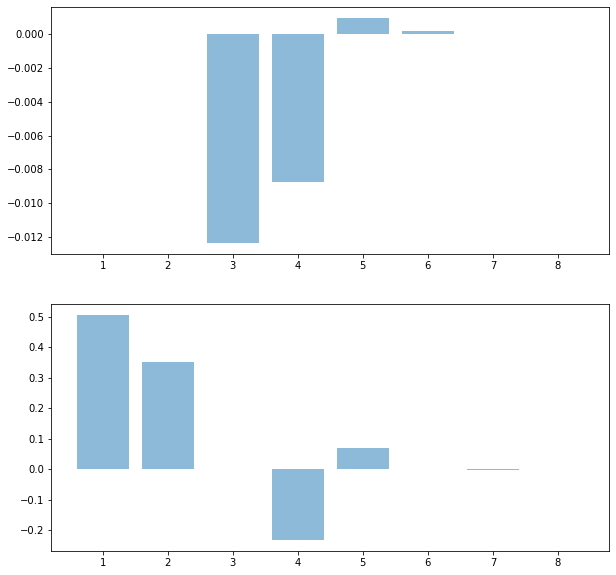

In [29]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2)

for i, coef in enumerate([lasso_coef, ridge_coef]):
    ax = axes[i]
    ax.bar(x=list(range(1, degree+1)), height=coef, alpha=0.5)

plt.show()

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!